<a href="https://colab.research.google.com/github/vanessaaleung/ds-case-studies/blob/master/network-analysis/game-of-thrones/Network_Analysis_of_Game_of_Thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import networkx as nx
%matplotlib inline

In [4]:
book1 = pd.read_csv('https://raw.githubusercontent.com/vanessaaleung/ds-case-studies/master/network-analysis/game-of-thrones/datasets/book1.csv')
book2 = pd.read_csv('https://raw.githubusercontent.com/vanessaaleung/ds-case-studies/master/network-analysis/game-of-thrones/datasets/book2.csv')
book3 = pd.read_csv('https://raw.githubusercontent.com/vanessaaleung/ds-case-studies/master/network-analysis/game-of-thrones/datasets/book3.csv')
book4 = pd.read_csv('https://raw.githubusercontent.com/vanessaaleung/ds-case-studies/master/network-analysis/game-of-thrones/datasets/book4.csv')
book5 = pd.read_csv('https://raw.githubusercontent.com/vanessaaleung/ds-case-studies/master/network-analysis/game-of-thrones/datasets/book5.csv')
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [9]:
# populate the network
books = []
book_files = [book1, book2, book3, book4, book5]
for book in book_files:
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

## 1. Degree Centrality
<p>The importance of a node in a network can be measured by looking at the number of neighbors it has, that is, the number of nodes it is connected to. This measure of importance is called <em>degree centrality</em>.</p>

According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book.

In [38]:
deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book5 = nx.degree_centrality(books[4])

sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[:10]

print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


<p>By looking at the evolution of degree centrality of characters who showed up in the top 10 of degree centrality in the first book - we can see that the importance of Eddard Stark dies off as the book series progresses. With Jon Snow, there is a drop in the fourth book but a sudden rise in the fifth book.</p>

Text(0.5, 1.0, 'Evolution of Degree Centrality')

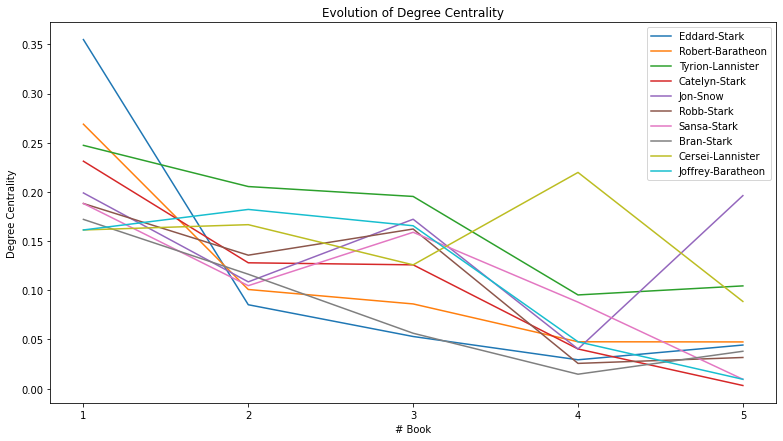

In [52]:
evol = [nx.degree_centrality(book) for book in books]
degree_evol_df = pd.DataFrame(evol)

ax = degree_evol_df[[character[0] for character in sorted_deg_cen_book1]].plot(figsize=(13, 7))
ax.set_xlabel('# Book')
ax.set_ylabel('Degree Centrality')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels([1, 2, 3, 4, 5])
ax.set_title("Evolution of Degree Centrality")

## 2. Betweenness Centrality
<p>By looking at the evolution of the Betweenness Centrality the top four characters of every book, we can see a peculiar rise in the importance of Stannis Baratheon over the books. In the fifth book, he is significantly more important than other characters in the network, even though he is the third most important character according to degree centrality.</p>



Text(0.5, 1.0, 'Evolution of Betweenness Centrality')

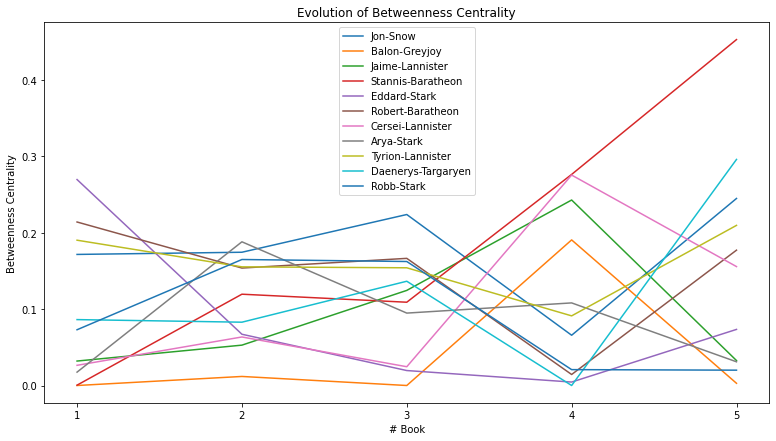

In [50]:
evol = [nx.betweenness_centrality(book) for book in books]
betweenness_evol_df = pd.DataFrame(evol).fillna(0)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

ax = betweenness_evol_df[list_of_char].plot(figsize=(13, 7))
ax.set_xlabel('# Book')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels([1, 2, 3, 4, 5])
ax.set_ylabel('Betweenness Centrality')
ax.set_title('Evolution of Betweenness Centrality')

## 3. PageRank
<p>PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network.</p>

Stannis, Jon Snow, and Daenerys are the most important characters in the fifth book according to PageRank.

Text(0.5, 1.0, 'Evolution of Page Rank')

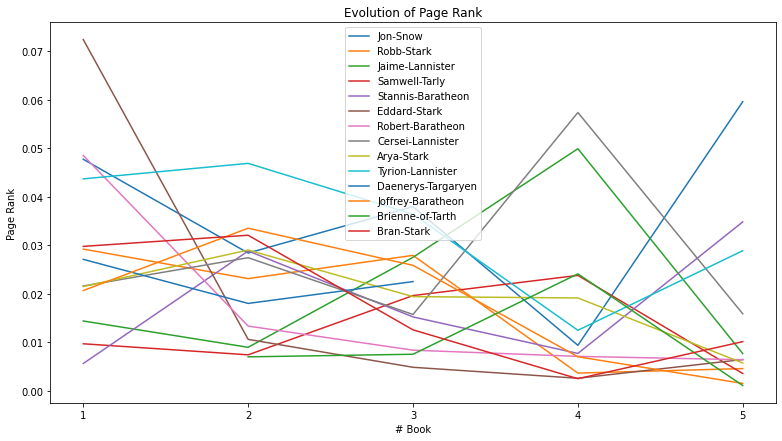

In [53]:
evol = [nx.pagerank(book) for book in books]
pagerank_evol_df = pd.DataFrame(evol)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

ax = pagerank_evol_df[list_of_char].plot(figsize=(13, 7))
ax.set_xlabel('# Book')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels([1, 2, 3, 4, 5])
ax.set_ylabel('Page Rank')
ax.set_title('Evolution of Page Rank')

## 4. Correlation between different measures
We see a high correlation between these three measures for our character co-occurrence network. So we've been looking at different ways to find the important characters in the Game of Thrones co-occurrence network.

In [61]:
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

cor = pd.DataFrame.from_records(measures)
cor = cor.rename({0: 'Page Rank', 1: 'Betweenness Centrality', 2: 'Degree Centrality'})

cor.T.corr()

,Page Rank,Betweenness Centrality,Degree Centrality
Page Rank,1.000000,0.793372,0.971493
Betweenness Centrality,0.793372,1.000000,0.833816
Degree Centrality,0.971493,0.833816,1.000000


## 5. Most important characters in the fifth book

In [ ]:
p_rank, b_cent, d_cent = cor.loc[0,].idxmax(), cor.loc[1,].idxmax(), cor.loc[2,].idxmax()
p_rank, b_cent, d_cent

('Jon-Snow', 'Stannis-Baratheon', 'Jon-Snow')